## 5-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

## 1. 데이터 이미지 준비하기

###### 클라우드의 샘플 이미지 가져오기

In [4]:
! unzip 파일명.zip

#unzip test.zip -d /home/저장하고싶은 디렉토리명

#출처: https://araikuma.tistory.com/120 [프로그램 개발 지식 공유]
#아래는 샘플이미지 가져와서 심볼릭 링크 만드는 명령어 
#심볼릭 링크 잘 못
#! ln -s ~/data ~/aiffel/face_embedding/faces

unzip:  cannot find or open 파일명.zip, 파일명.zip.zip or 파일명.zip.ZIP.


##### 저장한 이미지 읽어오고, 이미지 확인하기

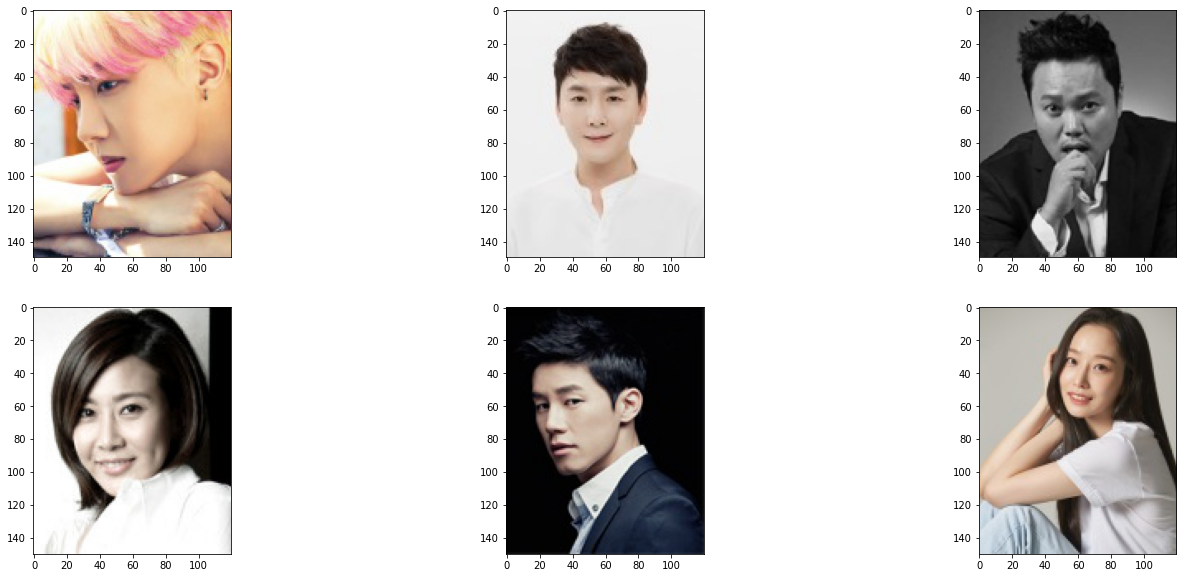

총 이미지 개수 1004


In [5]:
# 이미지 위치 : aiffel/face_embedding/faces

import os
import numpy as np

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/faces_img'
file_list = os.listdir(dir_path)
for file in file_list:
            img_path = os.path.join(dir_path, file)
        
#파일 리스트 출력 생략
#print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

print('총 이미지 개수', len(file_list))

### 2. 임베딩 추출할 이미지 만들기 

##### 1)  face_recognition.face_locations를 사용하여 얼굴 박스 찾기 + 
##### 임베딩 추출할 이미지 만들기 위해 박스를 크롭 하기 

[(241, 491, 562, 170)]


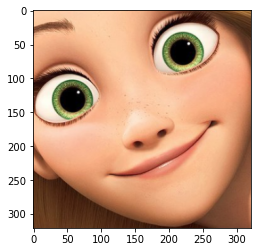

In [6]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

#이미지 파일에서, 해당 이미지만 가져오고 있음
image_path_ex = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/라푼젤.png'
#face_recognition.face_locations 으로 얼굴 영역 찾기
image_ex = face_recognition.load_image_file(image_path_ex)
face_locations_ex = face_recognition.face_locations(image_ex)

# 이미지에서 얼굴 영역의 좌표 출력
print(face_locations_ex)  

#얼굴 영역 인식 못하는 경우는 제외해줌
if len(face_locations_ex) != 0:
        a, b, c, d = face_locations_ex[0]
        #[행,열,차원(rgb)]
        cropped_face = image_ex[a:c,d:b,:]
        plt.imshow(cropped_face)

#첫번째 파일인 제이홉은 얼굴인식이 되지 않아  
#[]: 빈리스트가 나옴

##### 2) 이미지 마다 얼굴영역 추출해서, 크롭해주는 함수 만들기

In [7]:
import face_recognition
import os

def get_cropped_face(image_file):
        image = face_recognition.load_image_file(image_file)
        face_locations = face_recognition.face_locations(image)
    
    #페이스 안잡히면 그냥 넘겨주기
        cropped_face = None #정의된 변수가 아님, if문 내에서 정의된 변수 근데 return 해야되니까
        if len(face_locations) != 0:
            a, b, c, d = face_locations[0]
            #[행,열,차원(rgb)]
            cropped_face = image[a:c,d:b,:]

        return cropped_face

##### 3) 내 사진에 얼굴 크롭 사진 적용하기

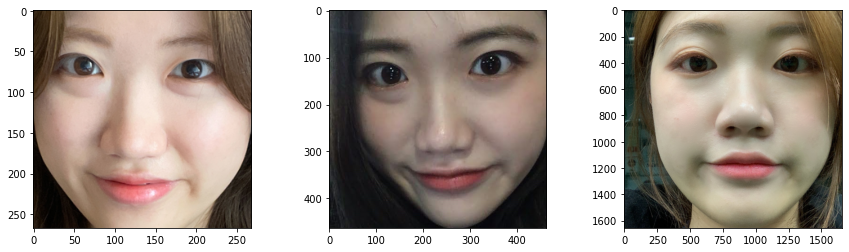

In [8]:
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/가영.png'
image_path2 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/가영2.jpg'
image_path3 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/가영3.jpg'

cropped_face1= get_cropped_face(image_path1)
cropped_face2 = get_cropped_face(image_path2)
cropped_face3 = get_cropped_face(image_path3)

plt.figure(figsize=(15,4))
#ax1 = plt.subplot(행,열,서브플랏)
ax1 = plt.subplot(1, 3, 1)
ax1 = plt.imshow(cropped_face1)
ax2 = plt.subplot(1, 3, 2)
ax2 = plt.imshow(cropped_face2)
ax3 = plt.subplot(1, 3, 3)
ax3 = plt.imshow(cropped_face3)


plt.show()

## 3. 추출된 얼굴 이미지 임베딩하기 

##### 1) 내 얼굴 영역의 임베딩 벡터 구해보기

In [9]:
#face_recognition.face_encodings(): Face Recognition 패키지에서 제공하는 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

#위에선 얼굴영역 추출해서 파일에 담아서 함수 사용
#나는 얼굴만 크롭된 이미지 변수로 가져와서 테스트로 임베딩 벡터 구해봄

#embedding : face(이미지중 얼굴만 크롭한 이미지)를 인자로 받아오는 get_face_embedding 함수 사용하는 객체 생성
embedding_1 = get_face_embedding(cropped_face1)  
embedding_2 = get_face_embedding(cropped_face2)
embedding_3 = get_face_embedding(cropped_face3)

print(embedding_1)
print(embedding_2)
print(embedding_3)

#내 사진 3개는 모두 임베딩 벡터가 구해짐  
#만약 임베딩 벡터가 구해지지 않는 이미지에 대한 예외처리 함수 만들때 고려해줘야함

[array([-9.10099149e-02,  6.05852865e-02,  9.32699367e-02, -8.21999982e-02,
       -1.59452558e-01, -6.16090223e-02, -8.92510340e-02, -9.73017439e-02,
        1.24234393e-01, -1.52189434e-01,  1.74391255e-01, -1.53252453e-01,
       -2.23084465e-01, -2.92404033e-02, -5.62315658e-02,  2.59998381e-01,
       -1.56623855e-01, -1.69140756e-01, -5.91284335e-02,  1.64788887e-02,
        5.77661321e-02,  7.32259965e-03, -1.06408317e-02,  2.58201547e-02,
       -1.30108818e-01, -3.45139474e-01, -7.64188319e-02,  1.75485294e-02,
       -5.94402775e-02, -7.42893144e-02, -5.87124527e-02,  6.89395294e-02,
       -1.77198067e-01, -2.59934757e-02,  5.27566224e-02,  1.05406985e-01,
       -7.46352412e-03, -8.80567655e-02,  1.16544351e-01, -3.47100906e-02,
       -3.12069267e-01,  1.90379545e-02,  1.03223853e-01,  2.28658944e-01,
        1.63509533e-01,  3.35655957e-02,  2.14272998e-02, -1.40581444e-01,
        1.04112379e-01, -1.72785416e-01, -4.68920916e-03,  1.27075836e-01,
        3.13858315e-02, 

##### 2) 모든 이미지 파일의 임베딩 벡터 구해서, dict 형태 리턴하는 함수 만들기

In [10]:
#images 디렉토리 안에 있는 모든 이미지 파일의 임베딩
#dict 구조에 담아 리턴
#딕셔너리의 각 엘리먼트는 사람 이름:임베딩벡터

cropped_face_dict = {} # 얼굴 이미지 저장
embedding_dict = {} # 각 이미지의 임베딩 벡터 저장   

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    #embedding_dict = {} # 각 이미지의 임베딩 벡터 저장
    
    for file in file_list:
        try:    #os.join(dir_path, file name): 인자를 전달하면 디렉토리 경로에 파일 이름을 조합하고 그 path를 리턴
                img_path = os.path.join(dir_path, file)
                #이미지 Path에서 이미지 가져오기
                image = face_recognition.load_image_file(img_path)
                #이미지 Path에서 얼굴만 크롭해서 가져오기
                face = get_cropped_face(img_path)
                #이미지에서 얼굴 좌표 위치들 저장
                face_locations = face_recognition.face_locations(image)
                
                #이미지에서 얼굴을 인식하지 못했을 경우 넘기기
                if face is None :
                    continue
                
                else : 
                    #얼굴 인식한 경우에, 얼굴이미지 임베딩 벡터 추출해서 embedding 변수에 저장
                    embedding = get_face_embedding(face)
                    
                    #얼굴 위치의 좌표에 대한 이미지 cropped_face에 저장
                    a, b, c, d = face_locations[0]
                    cropped_face = image[a:c, d:b, :]

                #파일에서 확장자 제외하고 파일명 가져오기
                filename = os.path.splitext(file)[0]
                
                if len(embedding) > 0: 
                # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김 
                    #embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                    #노드에서는 위 코드를 사용
                    #그런데 내가 가지고 있는 이미지에서, 임베딩 벡터 못구할 수 있음 
                    #그때를 위한 예외처리를 해줌
                    try:
                        #embedding_dict에 파일명으로 얼굴 임베딩 벡터가 저장됨
                        embedding_dict[filename]=get_face_embedding(face)[0]
                        #얼굴 이미지 cropeed_face_dict 딕셔너리에 저장
                        cropped_face_dict[os.path.splitext(file)[0]] = cropped_face                                           
                    except:
                        pass
        except:
                continue
    
    return embedding_dict

##### 3) 임베딩 벡터 구하는 함수: get_face_embedding_dict 사용해보기

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['가영']

#오류_1
#list index out of range
#임베딩 벡터가 존재 하지 않는것에 대한 예외처리 못해줬었기 때문

#오류_2
#IsADirectoryError: [Errno 21] Is a directory: '/aiffel/aiffel/face_embedding/faces_img/data/.ipynb_checkpoints'
#찾아보니까,, 에러에 21개의 원인이 추정되고,,, .ipynb_checkpoints들이 존재해서 문제가 나는게 주 원인이라 하는것 같음
#터미널로 숨은 파일들 보니까 ipynb_checkpoints로 끝나는 디렉토리들이 있었음
#근데 이건 쥬피터 노트북에서 체크포인트 하기위한 파일이라서 원래 존재하는 파일임
#그래도 오류가 계속 나서, 해당 폴더위치로 가서 (faces_img) 
#터미널에 rm -rf "find -type d -name .ipynb_checkpoints" -> -t 지원 안한다고 계속 안됨  
#rm -f ipynb_checkpoints 했더니 사라짐 
#근데 역시나 계속 다시 생기지.. 체크 포인트 하ls니까 ㅋㅋㅋ
#알고봤더니, 기존 2000개 이미지 사이에 .ipynb_checkpoints 파일이 따로 존재했었음...!!! 
#그래서 원본 zip 파일에서 삭제하고 다시 쥬피터 클라우드에 업로드해서 하니까 해결,,,
#디렉토리에서 에러가 나면 진짜 힘든것 같음..! 

#.ipynb_checkpoints 디렉토리는 깃허브에서도 오류 발생 원인이 종종 되는 것 같음 
#체크포인트 디렉토리 무시/제거 하는 명령어들도 공부할 수 있었음

#이후에 이미지 파일 수정해서 다시 돌리니까, 
#또 체크포인트 디렉토리 에러가 생김 
#그래서 함수에서 try except 를 겉에 한번더 씌워서 예외처리해버림

#https://discuss.pytorch.org/t/delete-the-ipynb-checkpoints-in-my-dataset-folder/90378/5
#https://ghostweb.tistory.com/1181

#임베딩벡터 딕셔너리 밖으로 빼서 해봄

array([-9.10099149e-02,  6.05852865e-02,  9.32699367e-02, -8.21999982e-02,
       -1.59452558e-01, -6.16090223e-02, -8.92510340e-02, -9.73017439e-02,
        1.24234393e-01, -1.52189434e-01,  1.74391255e-01, -1.53252453e-01,
       -2.23084465e-01, -2.92404033e-02, -5.62315658e-02,  2.59998381e-01,
       -1.56623855e-01, -1.69140756e-01, -5.91284335e-02,  1.64788887e-02,
        5.77661321e-02,  7.32259965e-03, -1.06408317e-02,  2.58201547e-02,
       -1.30108818e-01, -3.45139474e-01, -7.64188319e-02,  1.75485294e-02,
       -5.94402775e-02, -7.42893144e-02, -5.87124527e-02,  6.89395294e-02,
       -1.77198067e-01, -2.59934757e-02,  5.27566224e-02,  1.05406985e-01,
       -7.46352412e-03, -8.80567655e-02,  1.16544351e-01, -3.47100906e-02,
       -3.12069267e-01,  1.90379545e-02,  1.03223853e-01,  2.28658944e-01,
        1.63509533e-01,  3.35655957e-02,  2.14272998e-02, -1.40581444e-01,
        1.04112379e-01, -1.72785416e-01, -4.68920916e-03,  1.27075836e-01,
        3.13858315e-02,  

## 4. 얼굴임베딩 사이의 거리측정

Triplet Loss  
: 같은 사람의 얼굴 쌍을 임베딩 공간 상에서 가깝도록  
그리고 다른 사람의 얼굴 쌍을 멀도록 학습  

사진들 미리 모델로 자르고, 임베딩 벡터 추출해서 가져옴

임베딩을 통해 이미지를 저차원으로 만들었고, 
그래서 그렇게 나온 128차원의 벡터는  
넘파이로 연산을 하기위해, 배열(넘파이 array)로 변환해줌  

넘파이 연산하는 이유 : 벡터간 거리를 알아야 하니까  
그래서  
numpy.linalg.norm를 활용해서 L2 Norm Distance를 구함

#####  1) L2 구하는 함수_ 내 사진들 간의 거리 구하기

In [26]:
# 두 임베딩 벡터 간의 거리를 계산하는 함수

#가영, 가영2 사진
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('가영', '가영2')

#연한 화장 + 밝은곳
#조금 진한 화장 + 어두운 곳
#사진들을 일부러 좀 차이난 것을 선택해서 그런가 
#생각보다 거리감이 멀게 나온 것 같음

0.33304594138743526

In [27]:
#가영2, 가영3 사진
get_distance('가영2', '가영3')

#조금 진한 화장 + 어두운 곳
#밝은곳 + 아래 각도로 촬영

0.37393777132898276

In [28]:
#가영, 가영3 사진
get_distance('가영', '가영3')

#연한 화장 + 밝은곳
#밝은곳 + 아래 각도로 촬영

0.36678772384027736

In [29]:
#같은 인물 보통 얼마나 거리감 나오는지
#사나, 사나(2)
get_distance('사나', '사나(2)')
#각도나 조명, 메이크업 등이 다르면 
#본인이여도 이정도 거리감이 나오는게 맞는 것 같음 !

0.352824185273625

#####  2) L2 구하는 함수_ 연예인과 나와의 거리구하기

In [30]:
get_distance('가영', '유희열')

0.6615030076442103

In [67]:
get_distance('가영', '제니')
#유희열님 보다는 가까운 거리..!
#다행 ㅎㅎ

0.4677719586858047

In [32]:
#사나, 사나(2)
get_distance('사나', '윈터')

0.4094484323517783

## 5. 닮은 연예인이 누굴까

##### 1) 두 사진간 거리 구하는 함수 생성

In [33]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고,
#name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

##### 2) 닮은꼴 top5 출력 (순위, 이름, 임베딩 거리)

In [34]:

# 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 출력하는 함수

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    rank_cnt = 1 # 순위를 세는 변수
    pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
    end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
    for i in range(top+15):
        rank_cnt += 1
        if sorted_faces[i][0].find('가영') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
            pass_cnt += 1
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            end += 1
        if end == 5: # end가 10가 된 경우 연예인 5명 출력되었기에 종료합니다.
            break

In [35]:
get_nearest_face('가영')

순위 1 : 이름(진지희), 거리(0.3248316861948385)
순위 2 : 이름(소아린), 거리(0.33364502991173967)
순위 3 : 이름(소유), 거리(0.3352333693682369)
순위 4 : 이름(진기주), 거리(0.347591773045939)
순위 5 : 이름(이수빈), 거리(0.3645799443930991)


In [36]:
get_nearest_face('가영2')

순위 1 : 이름(엘수정), 거리(0.33506619159699985)
순위 2 : 이름(김슬기), 거리(0.3777499769787604)
순위 3 : 이름(진지희), 거리(0.3807014468905394)
순위 4 : 이름(정다빈), 거리(0.3866543731022674)
순위 5 : 이름(서이수), 거리(0.3884376801374487)


In [37]:
get_nearest_face('가영3')

순위 1 : 이름(소아린), 거리(0.3627799548001051)
순위 2 : 이름(김새론), 거리(0.37368374591567954)
순위 3 : 이름(한혜리), 거리(0.37540504880128645)
순위 4 : 이름(정호연), 거리(0.3792604024291356)
순위 5 : 이름(엘수정), 거리(0.3827843335701259)


## 6. 얼마나 닮은건지 시각화 하기
= 얼굴임베딩 공간의 시각화

##### 1) plot으로 시각화하기

In [65]:
#이미지 경로로 파일 가져오기
me1 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/가영.png'
me2 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/가영2.jpg'
me3 = os.getenv('HOME')+'/aiffel/face_embedding//faces_img/가영3.jpg'

image1 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/진지희.jpg'
image2 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/소아린.jpg'
image3 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/소유.jpg'
image4 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/진기주.jpg'
image5 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/이수빈.jpg'
image6 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/엘수정.jpg'
image7 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/김슬기.jpg'
image8 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/정다빈.jpg'
image9 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/서이수.jpg'
image10 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/김새론.jpg'
image11 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/한혜리.png'
image12 = os.getenv('HOME')+'/aiffel/face_embedding/faces_img/정호연.jpg'


#크롭해서 얼굴 이미지 저장
f_me1 = get_cropped_face(me1) #f_me1 : face_me1
f_me2 = get_cropped_face(me2)
f_me3 = get_cropped_face(me3)

f_image1 = get_cropped_face(image1)
f_image2 = get_cropped_face(image2)
f_image3 = get_cropped_face(image3)
f_image4 = get_cropped_face(image4)
f_image5 = get_cropped_face(image5)
f_image6 = get_cropped_face(image6)
f_image7 = get_cropped_face(image7)
f_image8 = get_cropped_face(image8)
f_image9 = get_cropped_face(image9)
f_image10 = get_cropped_face(image10)
f_image11 = get_cropped_face(image11)
f_image12 = get_cropped_face(image12)

가영의 순위
순위 1 : 이름(진지희), 거리(0.3248316861948385)
순위 2 : 이름(소아린), 거리(0.33364502991173967)
순위 3 : 이름(소유), 거리(0.3352333693682369)
순위 4 : 이름(진기주), 거리(0.347591773045939)
순위 5 : 이름(이수빈), 거리(0.3645799443930991)


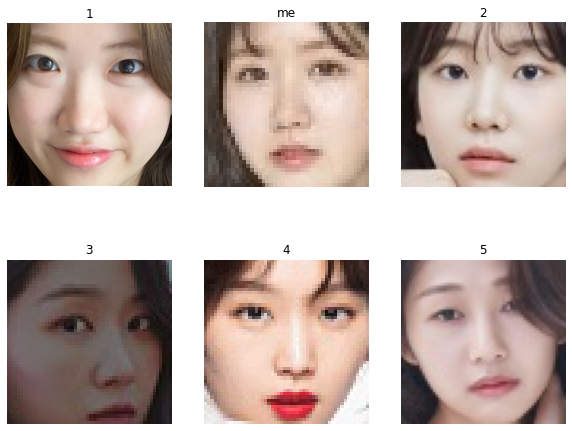

In [62]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(f_me1)
plt.axis('off')
plt.title('1')
plt.subplot(232)
plt.imshow(f_image1)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(f_image2)
plt.axis('off')
plt.title('2')
plt.subplot(234)
plt.imshow(f_image3)
plt.axis('off')
plt.title('3')
plt.subplot(235)
plt.imshow(f_image4)
plt.axis('off')
plt.title('4')
plt.subplot(236)
plt.imshow(f_image5)
plt.axis('off')
plt.title('5')

print('''가영의 순위
순위 1 : 이름(진지희), 거리(0.3248316861948385)
순위 2 : 이름(소아린), 거리(0.33364502991173967)
순위 3 : 이름(소유), 거리(0.3352333693682369)
순위 4 : 이름(진기주), 거리(0.347591773045939)
순위 5 : 이름(이수빈), 거리(0.3645799443930991)''')

가영2의 순위
순위 1 : 이름(엘수정), 거리(0.33506619159699985)
순위 2 : 이름(김슬기), 거리(0.3777499769787604)
순위 3 : 이름(진지희), 거리(0.3807014468905394)
순위 4 : 이름(정다빈), 거리(0.3866543731022674)
순위 5 : 이름(서이수), 거리(0.3884376801374487)


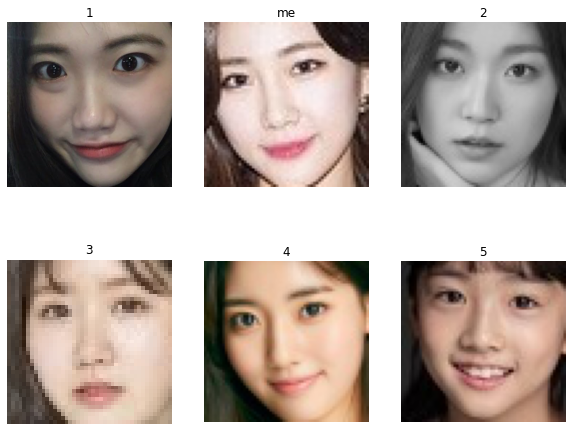

In [63]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(f_me2)
plt.axis('off')
plt.title('1')
plt.subplot(232)
plt.imshow(f_image6)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(f_image7)
plt.axis('off')
plt.title('2')
plt.subplot(234)
plt.imshow(f_image1)
plt.axis('off')
plt.title('3')
plt.subplot(235)
plt.imshow(f_image8)
plt.axis('off')
plt.title('4')
plt.subplot(236)
plt.imshow(f_image9)
plt.axis('off')
plt.title('5')

print('''가영2의 순위
순위 1 : 이름(엘수정), 거리(0.33506619159699985)
순위 2 : 이름(김슬기), 거리(0.3777499769787604)
순위 3 : 이름(진지희), 거리(0.3807014468905394)
순위 4 : 이름(정다빈), 거리(0.3866543731022674)
순위 5 : 이름(서이수), 거리(0.3884376801374487)''')

가영3의 순위
순위 1 : 이름(소아린), 거리(0.3627799548001051)
순위 2 : 이름(김새론), 거리(0.37368374591567954)
순위 3 : 이름(한혜리), 거리(0.37540504880128645)
순위 4 : 이름(정호연), 거리(0.3792604024291356)
순위 5 : 이름(엘수정), 거리(0.3827843335701259)


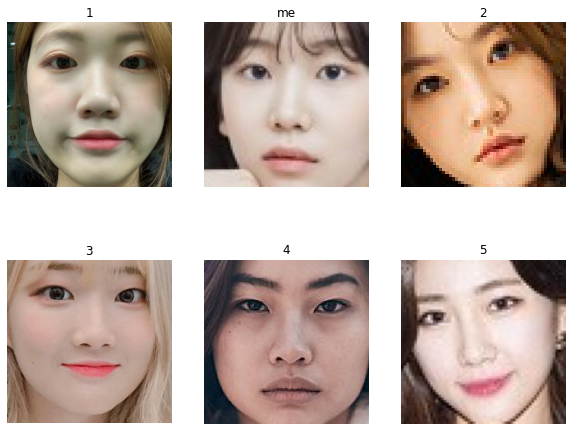

In [66]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(f_me3)
plt.axis('off')
plt.title('1')
plt.subplot(232)
plt.imshow(f_image2)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(f_image10)
plt.axis('off')
plt.title('2')
plt.subplot(234)
plt.imshow(f_image11)
plt.axis('off')
plt.title('3')
plt.subplot(235)
plt.imshow(f_image12)
plt.axis('off')
plt.title('4')
plt.subplot(236)
plt.imshow(f_image6)
plt.axis('off')
plt.title('5')

print('''가영3의 순위
순위 1 : 이름(소아린), 거리(0.3627799548001051)
순위 2 : 이름(김새론), 거리(0.37368374591567954)
순위 3 : 이름(한혜리), 거리(0.37540504880128645)
순위 4 : 이름(정호연), 거리(0.3792604024291356)
순위 5 : 이름(엘수정), 거리(0.3827843335701259)''')

#### 위 그래프 그리는게 너무 번거로워서 함수 생성!

###### 3) 함수 생성 : 파일 name 넣으면, top5 랑 이미지 plot 함께 출력
제출시간 내에 아직 못함..ㅎ 
계속 만들어보기로 !!!

In [ ]:
#얼굴 이미지를 딕셔너리 형태로 가져오려고 함
cropped_face_dict = {}

for file in file_list:
    img_path = os.path.join(dir_path, file)
    face = get_cropped_face(img_path) 
    if face is None :
        continue
    else :
        cropped_face_dict = face
        
#.ipynb_checkpoints 파일 제외하지 않아서 에러 발생
#근데 위에서 해당 부분은 이미 해결해두어서 패스

In [50]:
#5순위 파일들 하나씩 불러와서 plot 그리려고 함 
def img_plot(name, top=5):
        fig = plt.figure(figsize=(12, 10))
        #내 이미지 
        fig.add_subplot(1, top, 1)
        plt.imshow(cropped_face_dict[sorted_faces[0][0]])
        
        #닮은 연예인 top5 이미지
        for i,ax in range(1, top+1):
            fig.add_subplot(2, top, i)
            plt.imshow(cropped_face_dict[sorted_faces[i][0]])

In [127]:
#img_plot('가영') 이렇게, 파일명만 넣으면 
#알아서 top5랑 이미지 출력되는 함수 생성 시도
def img_plot(name, top=5):
    # name = input()
    def get_nearest_face(name, top=5):
        sort_key_func = get_sort_key_func(name)
        sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
        rank_cnt = 1 # 순위를 세는 변수
        pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
        end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
        for i in range(top+15):
            rank_cnt += 1
            if sorted_faces[i][0].find('가영') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
                pass_cnt += 1
                continue
            if sorted_faces[i]:
                print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
                end += 1
            if end == 5: # end가 10가 된 경우 연예인 5명 출력되었기에 종료합니다.
                return sorted_faces
    print()
    
    cropped_face_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path) 
        if face is None :
            continue
        else : ##해당 부분 손보기 그럼 될듯 !
            image = face_recognition.load_image_file(image_file)
            face_locations = face_recognition.face_locations(image)
            a, b, c, d = face_locations[0]
            cropped_face = image[a:c, d:b, :]
            cropped_face_dict[os.path.splitext(file)[0]] = cropped_face


    sorted_faces = get_nearest_face(name, top)
    fig = plt.figure(figsize=(12, 10))

    fig.add_subplot(1, top, 1)
    plt.imshow(cropped_face_dict[sorted_faces[0][0]])
    
    for i in range(1, 6):
        fig.add_subplot(2, top, i + top)
        plt.imshow(cropped_face_dict[sorted_faces[i][0]])

In [56]:
#img_plot('가영') 이렇게, 파일명만 넣으면 
#알아서 top5랑 이미지 출력되는 함수 생성 시도
#아래 부분이 다른데.. 슬라이싱 에러가 생긴다 ..!
def img_plot(name, top=5):
    # name = input()
    def get_nearest_face(name, top=5):
        sort_key_func = get_sort_key_func(name)
        sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
        
        
        rank_cnt = 1 # 순위를 세는 변수
        pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
        end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
        for i in range(top+1):
            rank_cnt += 1
            if sorted_faces[i][0].find('가영') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
                pass_cnt += 1
                continue
            if sorted_faces[i]:
                print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
                end += 1
            if end == 5: # end가 10가 된 경우 연예인 5명 출력되었기에 종료합니다.
                return sorted_faces


    print()
    sorted_faces = get_nearest_face(name, top)
    fig = plt.figure(figsize=(12, 10))

    fig.add_subplot(1, top, 1)
    plt.imshow(cropped_face_dict[sorted_faces[0][0]])
    
    for i in range(1, top+1):
        fig.add_subplot(2, top, i + top)
        plt.imshow(cropped_face_dict[sorted_faces[i][0]])


순위 1 : 이름(진지희), 거리(0.3248316861948385)
순위 2 : 이름(소아린), 거리(0.33364502991173967)
순위 3 : 이름(소유), 거리(0.3352333693682369)
순위 4 : 이름(진기주), 거리(0.347591773045939)


TypeError: 'NoneType' object is not subscriptable

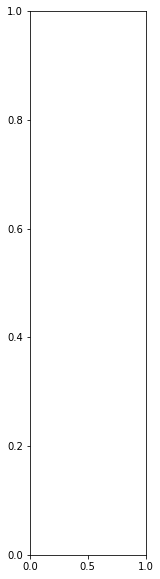

In [57]:
img_plot('가영')

##### 2) T-SNE 시각화 
시각화를 하기엔 128차원의 벡터를 가지고 있음  
때문에 고차원 데이터를 저차원 데이터로 바꾸는 차원 축소 과정이 필요  

##### 2-1) T-SNE의 원리가 무엇인지에 대해서 우선 알아보자   
**[1. t-분포]**   
T-SNE에서 T는 t-분포를 가르킴  
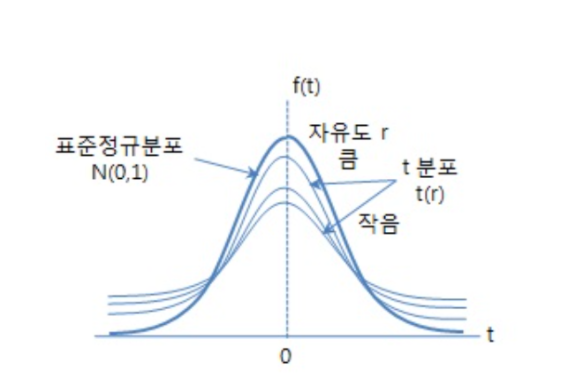
굵은 파란선 = 표준정규분포  
나머지 얇은선 = t-분포  

표준 정규분포보다 양쪽 꼬리 형태가 두터움 = 보다 분산이 더 크단 얘기  

표준 정규분포는 평균,분산을 통해 형태가 달라짐  
t-분포는 자유도에 따라 형태가 달라짐  

자유도 = 표본의 수 -1 인데,  
자유도(보통 30을 넘으면)가 커질 수록 표준정규분포에 가까워짐  
즉, 표본이 30개가 넘어가면 정규분포, 보다 적으면 t-분포를 사용하는 것이 일반적

-----
**[2. Dimensionality Reduction : 차원축소]**  
feature의 수가 너무 많으면 머신 러닝 모델의 성능을 저하시키기도 함  
feature의 갯수가 너무 많으면 overfit이 될 가능성 있음  
그래서 딥러닝에선 
* 이용 목적 및 사례  
1) 차원축소를 통해서 중요한 feaure개수는 남기고 불필요한 feature 개수를 줄이는데 사용됨  
2) overfit 방지 가능  
3) 2D,3D 시각화에도 쓰임   


* 사용 방법  
1) Feature Elimination : 단순한 feature 삭제  
2) Feature Selection : 통계적 방법으로 feature 들의 중요도에 rank 정함  
3) Feature Extraction : 독립적 feature 결합으로 새로운 feature을 만듦  

-----
**[3. T-SNE]**  
흐름  
1) 원본의 높은 차원에서 정규분포로 유사도 계산  
2) 이후 낮은 차원에 대응되는 데이터들 무작위 배치후, t-분포로 유사도 계산  
3) 정규분포로 계산된 유사도와 t-분포 유사도를 통해 데이터 포인트 갱신  
   = 높은 차원 공간의 유사도를 낮은 차원 공간에서 재현하는 것 
   
결국, 낮은 차원 공간에서 t-분포 이용하기 때문에  
유사도가 큰 상태 관계 재현시엔, 데이터 포인트를 더 가까이 배치  
반대로 유사도가 낮은 관계 재현시엔, 데이터 포인트 더 멀리 배치  
(t-분포가 더 분산이 큰걸 이용하는 것 같음  
더 많은 내용은 아래 링크에  
https://gaussian37.github.io/ml-concept-t_sne/)  

-----
위에서 말했듯이 시각화를 하기엔 128차원의 벡터를 가지고 있음  
때문에 고차원 데이터를 저차원 데이터로 바꾸는 차원 축소 과정이 필요  

이때 차원 축소 방법은 T-SNE 외에 PCA도 있음  

**PCA vs T-SNE**  
**- PCA란?**   
주성분 분석 ( Principal Component Analysis )  
모든 차원의 축에 따른 값의 변화도인 분산(Variance)을 확인한 뒤  
그 중 변화가 가장 큰 **주요한 축을 남기는** 방법  

**- T-SNE란?**  
고차원 상에서 먼 거리를 **저차원 상에서도 멀리 배치되도록**  
차원을 축소하는 방식  
random하게 목표하는 차원에 데이터들을 배치한 후  
각 데이터들을 **고차원 상에서의 배치와 비교**를 하면서  
**위치를 변경**해주는 알고리즘

PCA에서는 모든 차원이 잘 반영 X  
T-SNE는 Iteration을 거칠수록 가까운 벡터들이 잘 군집한 형태로 차원 축소 o

PCA, T-SNE 모두 사이킷런에서 제공하는 차원 감소 방법  
우선 **T-SNE 시각화**를 도전

자잘한 오류가 너무 많아서,  
우수노드를 참고해서 진행함..! ㅠㅠㅠ 

##### 2-2) 임베딩 벡터, 크롭된 얼굴 이미지 리스트 만들어주기  
해당 사진이 갖는 특성이 임베딩 벡터에 모두 들어가 있고,  
이 임베딩 벡터를 사용해서  
결국 크롭된 얼굴 이미지를 가지고 분포도를 시각화 해줄 것이기 때문

In [12]:
#임베딩 벡터 딕셔너리 = embedding_dict
#해당 딕셔너리의 value 값 = 임베딩 벡터만 가져옴
#여기서는 '가영' 사진의 임베딩 벡터?
#위에 벡터 구하는 함수로 내 벡터를 구해야만 해당 값이 나옴

embedding_vector = []

for value in embedding_dict.values():
    embedding_vector.append(value.tolist())

embedding_vector = np.array(embedding_vector)

print(np.array(embedding_vector).shape)

(797, 128)


In [13]:
#얼굴 이미지 딕셔너리 = cropped_face_dict
#해당 딕셔너리에서 value값 = 얼굴 이미지들만 가져옴
#여기서는 '가영' 사진의 얼굴이미지

import cv2
IMG_SIZE = 28

face_list = []
for value in cropped_face_dict.values():
    face = cv2.resize(value, (IMG_SIZE, IMG_SIZE))
    face_list.append(face)

len(face_list)
face_list = np.array(face_list)
face_list.shape

#임베딩 dict 반환하는 함수 만들때 
#크롭 페이스 딕트도 만드는거 우수노드 코드보고 하기
#내가 만든 코드랑 혼합해서 해보기 (완료)

#1) 성연님 코드 보면서, 그 이미지 plot 그리기
#1) 이미지랑 같이 나오게 하는 함수 생각했다가 우수노드 추천 받음
#2) 그래서 참고하면서 코드 짯고,
#ㅇ3) 결국 T 시각화도 성공 
#ㅇ4) T 시각화는 주석 달아서 다 공부한거 해놓기
#ㅇ5) T 개념도 한번 다루기 :https://gaussian37.github.io/ml-concept-t_sne/
#6) 사진이 너무 많이 보이니까,, ㅎㅎㅋ 거리감 모르겠,,
#7) 성연님 그 점 그래프로 1,2,3비교해서 해보기 
#ㅇ8) 해당 모델이 거리감 잘 하고 있는거 맞는지, 보통 본인이면 어느정도
#ㅇ거리감이 나오는지 알아보기 위해서 나 말고, 태연과 태연 사진 비교해보기 !

(797, 28, 28, 3)

In [14]:
from sklearn.manifold import TSNE
import scipy as sp
#%%time

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)

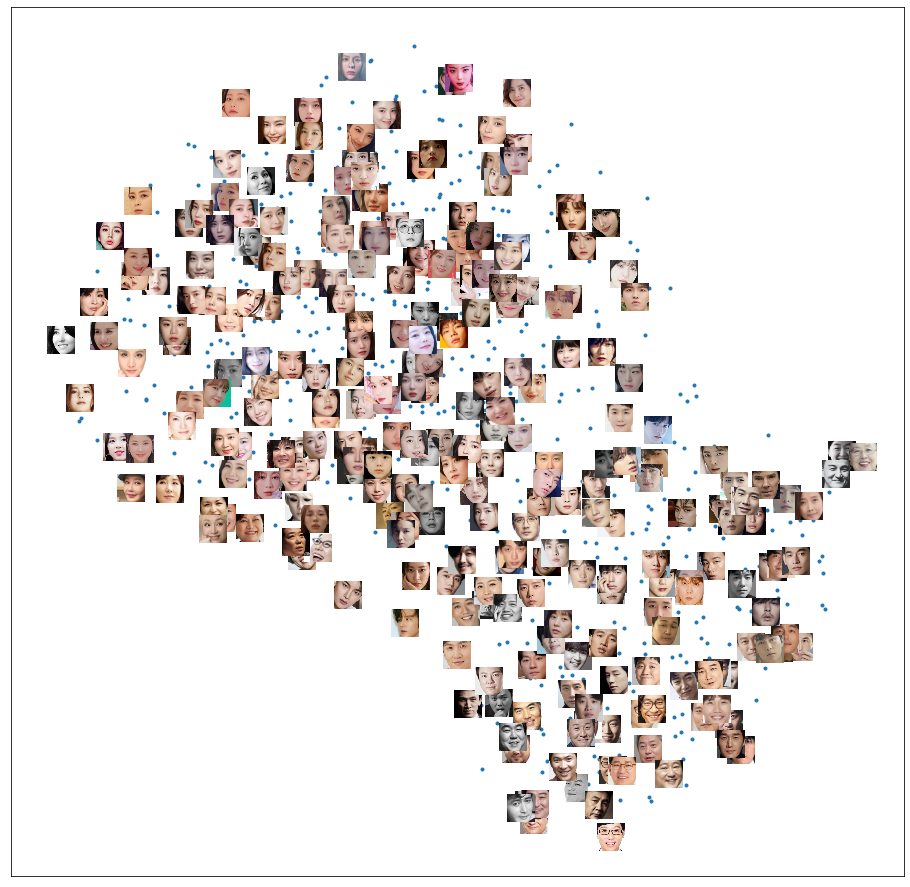

In [15]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(embedding_vector[:])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', cmap='rainbow')
for i in range(279):
    imagebox = OffsetImage(face_list[i].reshape(28, 28, 3))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

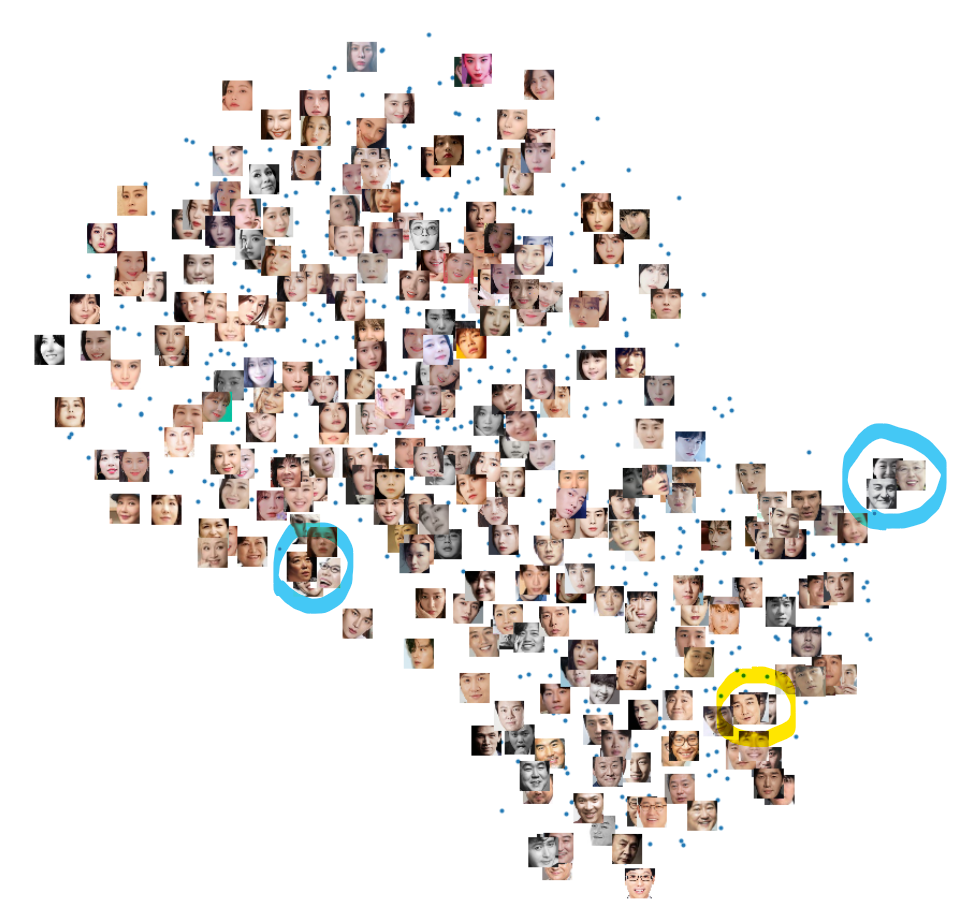

파란색 부분 보면  
같은 각도나 표정일 때 유사도를 높게 책정함  
각도에 구애받지 않을 순 없나 생각을 함  

노란색 부분 보면  
유사도가 높아서 너무 가까우니 겹치는 것을 확인 할 수 있음  

유사도에 따라 거리가 잘 반영된 것 같아  
성공적인 클러스팅이라고 판단됨  

##### 3) 시각화 tkinter

In [141]:
#tkinter 모듈 임포트
import matplotlib
matplotlib.use('Agg')
import tkinter
tkinter.use('Agg')
root = Tk()
label = Label(root, text='Hello World')
label.pack()

root.mainloop()

#계속 TclError에러가 나서 알아보니까
#환경 변수에 대해서 터미널에 export DISPLAY=:0.0 명령어 통해 설정해야한다고 함
#근데도 안됨..
#환경 변수에 대한 설명 좋은 듯 
#https://askubuntu.com/questions/432255/what-is-the-display-environment-variable

#코랩, 쥬피터에서는 tkinter가 작동하지 않는다고 함
#몇시간 했는데 ㅠ 쏘 허탈,,,ㅎ
#https://github.com/jupyterlab/jupyterlab/issues/9660
#https://www.inflearn.com/questions/60147

#로컬 환경에서 시도해보면 좋을것 같음
#아래 링크는 로컬에서 시도할때 좋은 흐름인듯
#https://smoothiecoding.kr/python-tkinter-installation/

#flask는 지원하는 것 같은데.. 나중에 해보기 
#https://bio-info.tistory.com/45

TclError: no display name and no $DISPLAY environment variable

## 회고

### 💚누브릭 평가  
**1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5 구하기**   
닮은 꼴 순위, 이름, 임베딩 거리 등을 정렬하여 출력함  
얼굴 이미지와 함께 출력하는 함수 생성도 도전함

**2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾음**    
1000개의 이미지를 가지고 닮은꼴을 찾아내려고 시도함  
본인과의 사진에 대한 거리감보다 더 가까운 연예인들이 나옴  
이미지로 볼때 어느정도 닮았다고 판단되기도 함  

**3. 다양하고 재미있는 결과 시각화 시도**    
plot, T-SNE 그리고 시도 밖에 못했던 trinker 까지  
다양한 시각화 시도를 하였다.

### 💚어려웠던 점  
**1. list index out of range 에러**  
해당 에러가 이미지를 읽어와서 얼굴지점 찾는 것부터 모두 났었음  
이유는 이미지 개수가 많아질수록,  
얼굴이 인식 안되는 이미지가 있기 때문이었음  
때문에 얼굴 인식이 안되는 이미지들에 대해 예외처리를 모두 해줘야했음  
해당 오류가 딕셔너리에서 파일명(키)값으로 임베딩 벡터 추출할 때부터  
나기 시작해서,, 딕셔너리의 키를 추출하는 파일 경로나,  
파일명들이 잘못된 줄 알고 헤매었음  

**2. 체크포인트 예외처리**  
.ipynb_checkpoints, core 파일이 자동 생성되어서 계속 에러를 발생시킴  
파일을 삭제하려고만 시도했었는데,  
예외처리를 할 수 있다는 생각을 못하고 있다가 시도함  
그래도 성공적으로 에러 해결  

### 💚배운점  
**1. 예외처리**  
예외 처리가 얼마나 중요한지 정말 잘 알 수 있었음  

**2. .ipynb_checkpoints**  
쥬피터에서 체크 포인트(실시간 저장)하기 위해서  
해당 파일을 생성해서 하고있다는 것을 알 수 있었음  
그리고 깃허브에서 커밋할때 많이 오류가 나서  
무시/제외/제거 처리를 한다고 했는데 해당 부분에 대해서도 공부할 수 있었음

**3. T-NSE**  
t분포가 무엇인지, 실제로 어떻게 시각화 하는지 등에 대해서
배울수 있었다.  
공부 내용은 위에 있으니 생략  

### 💚더 개선하고 싶은 점  
**1. T-NSE 구현** 
직접 내 생각으로 구현하고 싶었으나 그러지 못했다  
이론으로 공부하고, 구현하려니 그건 또 조금 다른 문제였다  
T-NSE에 대해서 유튜브 강의도 듣고 해봤는데  
너무 오랜시간이 걸려서.. 비효율적인 공부라고 생각되었다  
그래서 우선은 우수노드를 클론코딩 하며 구현시켰고
추후 코드 바이 코드 공부해나가면서 좀 더 이해력을 높이고자 한다.


**2. top5 + 이미지 함수 구현** 
아직 함수 하나를 오롯이 만들어 내는 것에 대해서는 미숙하다  
알고리즘 능력이 부족한것 같아서  
알고리즘 스터디를 하고 있는데, 열심히 해야겠다  
이번 노드에서 특히 어떤 기능을 함수화해서 일반화하여 확장성을 높이는 시도를  
많이해서 해보고 싶은데 기한내 성공하지 못해서 아쉽긴하다  